# Overview

This notebook tries to train a simple decision tree on the ratios and use it to choose the most important ratios to train other models.

## Imports


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Assuming `ratios_df` is your DataFrame
df = pd.read_csv("./ratios.csv")
df.head()

,file_path,salient,distance_0_1_to_distance_0_2,distance_0_1_to_distance_0_3,distance_0_1_to_distance_0_4,distance_0_1_to_distance_0_5,distance_0_1_to_distance_0_6,distance_0_1_to_distance_0_7,distance_0_1_to_distance_0_8,distance_0_1_to_distance_0_9,...,distance_21_23_to_distance_21_24,distance_21_23_to_distance_22_23,distance_21_23_to_distance_22_24,distance_21_23_to_distance_23_24,distance_21_24_to_distance_22_23,distance_21_24_to_distance_22_24,distance_21_24_to_distance_23_24,distance_22_23_to_distance_22_24,distance_22_23_to_distance_23_24,distance_22_24_to_distance_23_24
0,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0,0.826776,0.758674,0.682074,0.768227,2.050519,1.535174,1.283229,0.745853,...,1.829211,4.023505,2.009589,1.425642,2.199585,1.098610,0.779376,0.499462,0.354328,0.709420
1,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0,0.602787,0.424272,0.397356,1.910233,0.519221,0.519906,1.011723,0.529132,...,2.028708,3.390883,2.564413,1.557727,1.671450,1.264062,0.767842,0.756267,0.459387,0.607440
2,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0,1.640046,0.769222,0.884679,0.837385,2.096330,3.584330,1.321587,0.700350,...,2.412042,2.411467,2.626490,1.453204,0.999762,1.088908,0.602479,1.089167,0.602623,0.553287
3,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0,0.914327,0.670006,0.638653,0.762790,1.754330,0.737882,1.448020,0.698797,...,1.960106,3.515815,2.615556,1.583582,1.793686,1.334395,0.807906,0.743940,0.450417,0.605447
4,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0,1.043585,0.715072,0.876948,0.811852,1.950466,4.604694,1.428379,0.727091,...,2.024954,3.519476,2.132471,1.398366,1.738052,1.053096,0.690567,0.605906,0.397322,0.655749


In [29]:
# len(df[df['salient_x']==0])

In [13]:
# len(df[df['salient_y']==0])

In [3]:
# Drop the 'file_path' column and separate features (X) and labels (y)
X = df.drop(columns=["file_path", "salient"])
y = df["salient"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
clf = DecisionTreeClassifier(random_state=42)

In [5]:
# Initialize the Decision Tree Classifier with hyperparameters to prevent overfitting
clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,  # Limit the maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    # max_features="sqrt",  # Consider only a subset of features at each split
)

In [6]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [7]:
# Save the checkpoint
import joblib

# Save the model
joblib.dump(clf, 'decision_tree_model.joblib')

# # To load the model
# clf = joblib.load('decision_tree_model.joblib')

['decision_tree_model.joblib']

In [8]:
# Clean the input and save

# Get the feature importances
importances = clf.feature_importances_

# Find columns that were used in the decision tree (importance > 0)
used_features = [column for column, importance in zip(X_train.columns, importances) if importance > 0]

# Include the 'file_path' column at the start
used_features.insert(0, 'file_path')

df[used_features]

,file_path,distance_0_1_to_distance_1_4,distance_0_2_to_distance_8_14,distance_0_3_to_distance_5_15,distance_0_3_to_distance_9_12,distance_0_5_to_distance_3_18,distance_0_6_to_distance_17_19,distance_0_11_to_distance_10_12,distance_1_4_to_distance_3_5,distance_1_6_to_distance_5_8,...,distance_6_21_to_distance_19_20,distance_8_24_to_distance_12_16,distance_9_10_to_distance_11_14,distance_9_18_to_distance_21_22,distance_10_17_to_distance_19_21,distance_11_16_to_distance_16_20,distance_14_17_to_distance_17_24,distance_14_22_to_distance_17_20,distance_15_23_to_distance_20_21,distance_16_17_to_distance_16_24
0,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0.502406,0.372135,1.408197,1.336356,0.412862,0.249351,1.067841,1.352267,1.178386,...,0.601750,0.354790,0.802245,1.705457,3.545527,1.124428,1.580244,1.059071,6.223860,1.057168
1,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0.406778,0.486115,4.343431,1.991294,0.208413,0.593044,0.808679,1.197972,1.191798,...,0.916044,0.398523,0.593341,1.228192,2.212212,1.430332,1.055666,0.974845,7.480364,1.048978
2,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0.469915,0.219622,2.896883,1.471632,0.373665,0.226081,0.099009,1.309992,1.224268,...,1.144230,0.228951,0.397615,2.534616,4.835748,1.269053,1.280389,0.809324,6.583030,1.070861
3,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0.582902,0.348464,1.701172,1.340573,0.367975,0.296404,0.886582,0.925631,1.196142,...,0.845410,0.353020,0.724407,1.982564,4.514466,1.669460,1.831597,1.120051,7.662123,1.082481
4,train/cow_bite/salient1/4ff8a74c52c529eceb817a...,0.467410,0.305794,1.563254,1.265287,0.336524,0.282936,0.694656,1.225129,1.214941,...,0.777597,0.261697,0.661249,2.465349,2.893873,2.138783,1.744861,1.190205,8.790494,0.040663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,train/cow_bite/salient2/c84389d26efdcfa6df0f76...,0.737177,0.125586,0.748412,0.185688,0.205741,0.135735,0.490187,0.828447,1.239089,...,10.462749,0.657842,0.939544,94.817082,164.707138,0.348187,0.005924,1.015652,26.178437,6.721646
4416,train/cow_bite/salient2/c84389d26efdcfa6df0f76...,0.805449,0.911968,0.831842,0.214427,0.197762,1.639465,0.672561,0.771864,0.746131,...,29.095457,0.655617,7.996634,48.802608,10.629479,1.213991,0.023043,1.201733,11.954823,0.035599
4417,train/cow_bite/salient2/c84389d26efdcfa6df0f76...,0.842286,0.892681,0.805950,0.206588,0.187702,1.668605,0.784852,0.759234,0.691957,...,24.340732,0.666293,7.839623,55.074640,19.578062,0.631076,0.017453,1.184493,16.764129,0.256494
4418,train/cow_bite/salient2/c84389d26efdcfa6df0f76...,0.796629,0.894739,0.640930,0.212861,0.385352,1.862467,0.579272,0.714674,0.363169,...,7.684803,0.518650,7.972471,76.233393,27.739414,0.833477,0.200902,0.873204,22.378796,0.139442


In [9]:
used_features

['file_path',
 'distance_0_1_to_distance_1_4',
 'distance_0_2_to_distance_8_14',
 'distance_0_3_to_distance_5_15',
 'distance_0_3_to_distance_9_12',
 'distance_0_5_to_distance_3_18',
 'distance_0_6_to_distance_17_19',
 'distance_0_11_to_distance_10_12',
 'distance_1_4_to_distance_3_5',
 'distance_1_6_to_distance_5_8',
 'distance_1_7_to_distance_4_8',
 'distance_1_7_to_distance_8_18',
 'distance_1_8_to_distance_21_24',
 'distance_1_13_to_distance_4_8',
 'distance_1_15_to_distance_4_8',
 'distance_1_16_to_distance_2_24',
 'distance_1_16_to_distance_17_23',
 'distance_1_21_to_distance_9_12',
 'distance_2_8_to_distance_4_17',
 'distance_2_9_to_distance_22_23',
 'distance_2_10_to_distance_4_7',
 'distance_2_14_to_distance_4_15',
 'distance_3_4_to_distance_8_12',
 'distance_3_7_to_distance_16_18',
 'distance_3_8_to_distance_13_17',
 'distance_3_12_to_distance_18_22',
 'distance_3_16_to_distance_11_23',
 'distance_3_18_to_distance_10_11',
 'distance_3_21_to_distance_7_23',
 'distance_4_14_to_

In [10]:
# Specify the file path where you want to save the list
file_path = 'features.txt'

# Open the file in write mode and write each item on a new line
with open(file_path, 'w') as file:
    for item in used_features:
        file.write(item + '\n')

print(f'List has been written to {file_path}')

List has been written to features.txt


In [11]:
df = df[used_features]
df.to_csv('./data/cleaned_ratios.csv')

In [12]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.5248868778280543
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.91      0.68       729
           1       0.33      0.05      0.09       597

    accuracy                           0.52      1326
   macro avg       0.44      0.48      0.39      1326
weighted avg       0.45      0.52      0.41      1326



In [30]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# # Assuming ratios_df is your DataFrame
# df = pd.read_csv("./data/ratios.csv")
# df.head()

# Drop the 'file_path' column and separate features (X) and labels (y)
X = df.drop(columns=["file_path", "salient"])
y = df["salient"]

# Define the parameter grid for the Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Set up 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with the DecisionTreeClassifier and parameter grid
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Perform the grid search
grid_search.fit(X, y)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best parameters found by grid search:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train the best classifier on the entire dataset
best_clf.fit(X, y)

# Predict on the same dataset
y_pred = best_clf.predict(X)

# Evaluate the best classifier
print("Classification Report:\n", classification_report(y, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


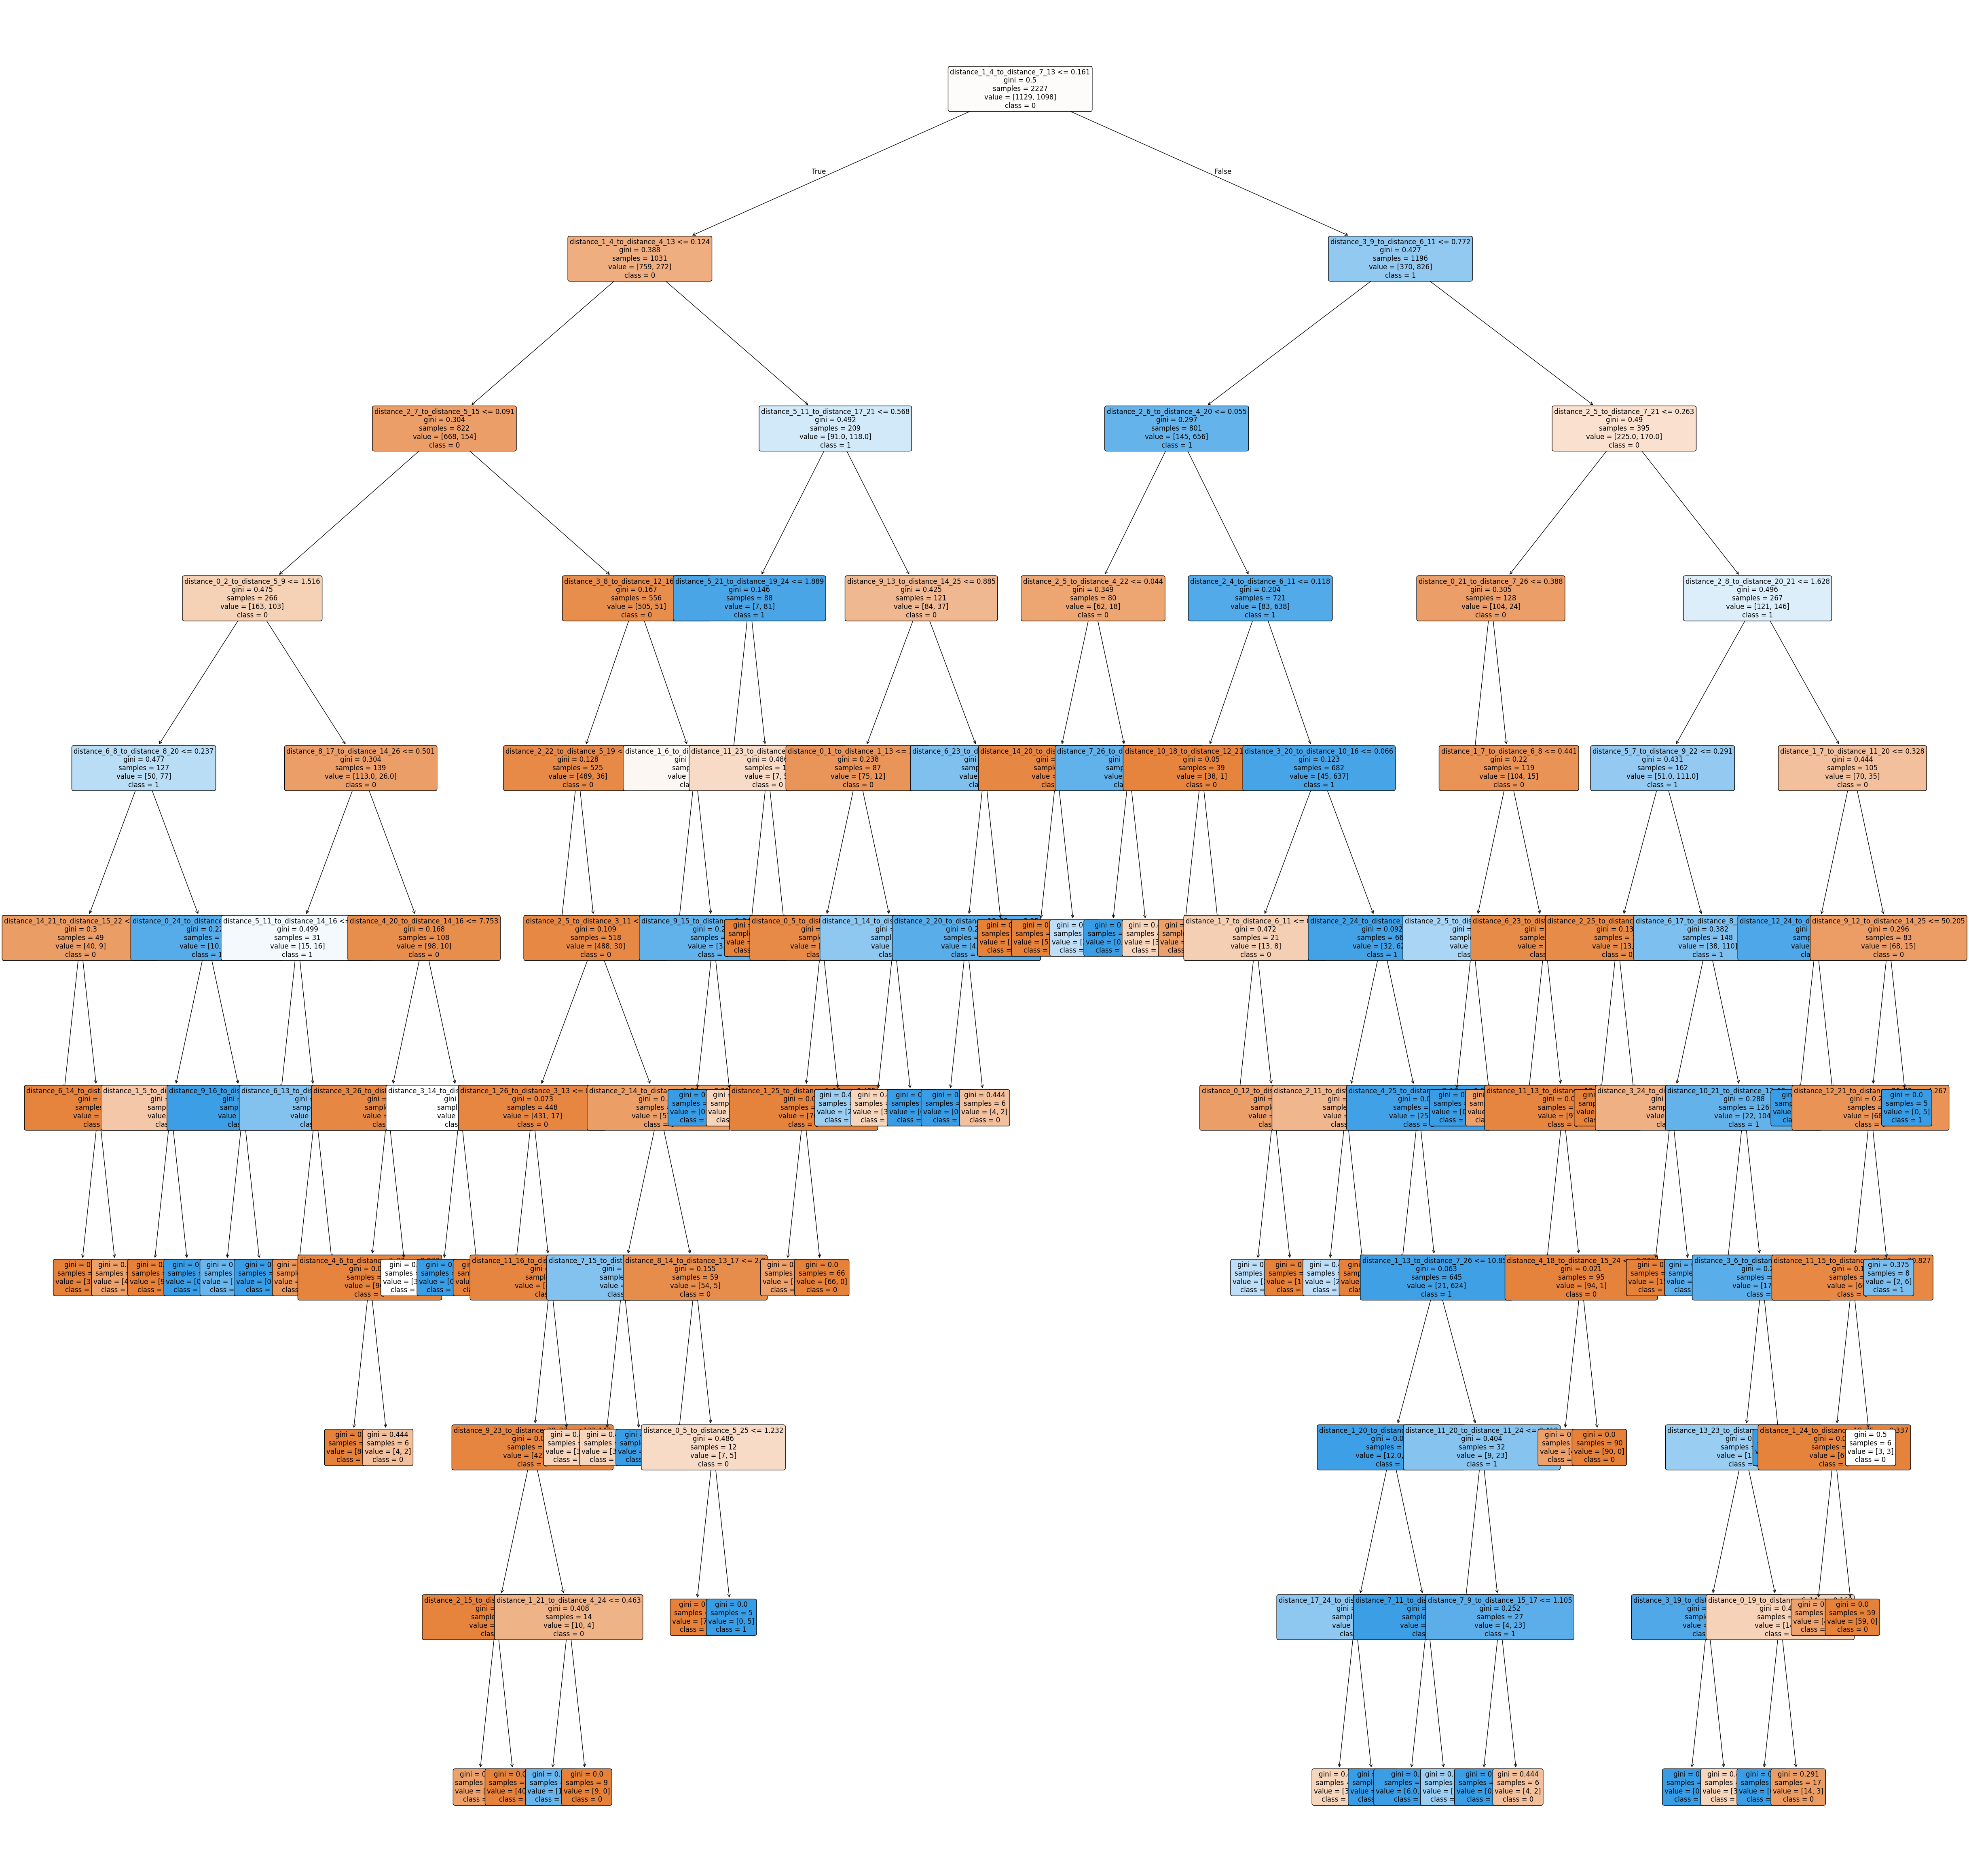

In [19]:
# Plot the decision tree
plt.figure(figsize=(60, 60))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True, fontsize=12)
plt.show()

cv_results
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best parameters found by grid search: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8747323556740596
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1129
           1       0.98      0.96      0.97      1098

    accuracy                           0.97      2227
   macro avg       0.97      0.97      0.97      2227
weighted avg       0.97      0.97      0.97      2227

## sqrt max features
```
Accuracy Score: 0.8475336322869955
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       347
           1       0.83      0.86      0.84       322

    accuracy                           0.85       669
   macro avg       0.85      0.85      0.85       669
weighted avg       0.85      0.85      0.85       669
```

no sqrt max features

Accuracy Score: 0.8460388639760837
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       347
           1       0.84      0.84      0.84       322

    accuracy                           0.85       669
   macro avg       0.85      0.85      0.85       669
weighted avg       0.85      0.85      0.85       669

## Default values
Accuracy Score: 0.8340807174887892
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       347
           1       0.83      0.83      0.83       322

    accuracy                           0.83       669
   macro avg       0.83      0.83      0.83       669
weighted avg       0.83      0.83      0.83       669